# Aprendizagem: Definindo capacidade da rede

### O objetivo é desenvolver um modelo Multilayer Perceptron (MLP) para o problema de classificação multiclasse blobs e demonstrar o impacto da capacidade no aprendizado do modelo.

## Importando as bibliotecas

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from numpy import where
# Dataset
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Modelo
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

2022-08-25 13:34:10.901250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 13:34:10.901304: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Visualização exploratória dos dados

In [2]:
n_classes=20
n_features=100
X, y = make_blobs(n_samples=1000, centers=n_classes, n_features=n_features, cluster_std=2, random_state=2)

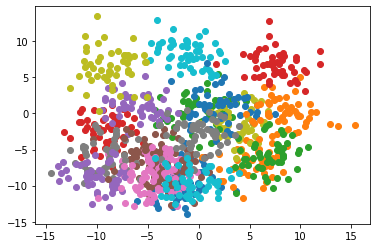

In [3]:
for class_value in range(n_classes):
    row_ix = where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Criando o conjunto de treino e teste

In [4]:
def create_dataset():
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2) 
    y_categorical = to_categorical(y)
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [5]:
X_train, y_train, X_test, y_test = create_dataset()

In [6]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(700, 100) (700, 20) (300, 100) (300, 20)


## Treinando e avaliando o modelo 

In [7]:
def model_training(n_nodes, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())

    # Compilando e treinando o modelo    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

In [8]:
def model_evaluation(model,X_test, y_test):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

## Avaliando a capacidade do modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 101       
                                                                 
 dense_1 (Dense)             (None, 20)                40        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


2022-08-25 13:34:17.051496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-25 13:34:17.051566: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-25 13:34:17.051615: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daniel-Aspire-A315-42G): /proc/driver/nvidia/version does not exist
2022-08-25 13:34:17.052809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/daniel/.local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:10

None
nós=1: 0.120
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
 dense_3 (Dense)             (None, 20)                60        
                                                                 
Total params: 262
Trainable params: 262
Non-trainable params: 0
_________________________________________________________________
None
nós=2: 0.357
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
 dense_5 (Dense)             (None, 20)                80        
                                                                

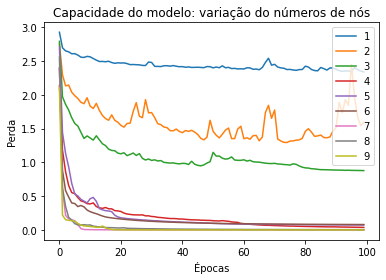

In [9]:
for n_nodes in range(1,10):
    
    model, history = model_training(n_nodes, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    print('nós=%d: %.3f' % (n_nodes, test_acc))
    plt.plot(history.history['loss'], label=str(n_nodes))

plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Capacidade do modelo: variação do números de nós')    
plt.legend()
plt.show()

In [10]:
def model_training(n_nodes, n_layers, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

camadas=1; nós=1: 0.137
camadas=1; nós=2: 0.373
camadas=1; nós=3: 0.673
camadas=1; nós=4: 0.747
camadas=1; nós=5: 0.997
camadas=1; nós=6: 0.877


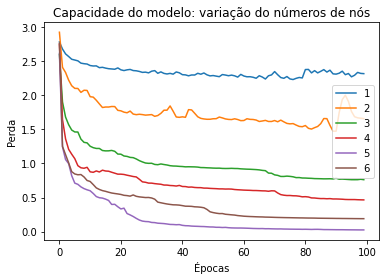

camadas=2; nós=1: 0.157
camadas=2; nós=2: 0.163
camadas=2; nós=3: 0.280
camadas=2; nós=4: 0.593
camadas=2; nós=5: 0.813
camadas=2; nós=6: 1.000


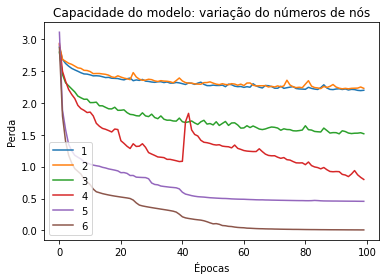

camadas=3; nós=1: 0.033
camadas=3; nós=2: 0.400
camadas=3; nós=3: 0.310
camadas=3; nós=4: 0.617
camadas=3; nós=5: 0.660
camadas=3; nós=6: 0.477


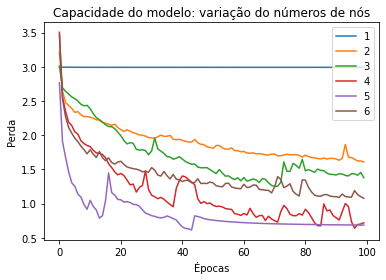

In [11]:
for n_layers in range(1,4):
    for n_nodes in range(1,7):
        model, history = model_training(n_nodes, n_layers, X_train, y_train)
        test_acc = model_evaluation(model,X_test, y_test)
        print('camadas=%d; nós=%d: %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()

Atividade(0.5): Realizar a avaliação da capacidade da MLP: 
<ol>
        <li> Extrapolar o tutorial acima para outro datasetmake_gaussian_quantiles para gerar dados sintéticos. Para alcançar um dataset mais real, vamos inserir um ruído gaussiano, conforme o código abaixo que deve ser utilizado na função create_dataset(). </li>
        <li> Aumentar o número de nós e camadas para encontrar o ponto em que o algoritmo de aprendizado não é mais capaz de aprender o problema. </li> 
    
</ol>

In [12]:
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import numpy as np

X1, y1 = make_gaussian_quantiles(cov=3., n_samples=10000, n_features=2, n_classes=3, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1, n_samples=5000, n_features=2, n_classes=3, random_state=1)
X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)

X = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))

![title](figura01.png)